# AIRLINES TICKET PRICE PREDICTION
We will develop a model to predict fare of Airlines at various routes

In [1]:
### Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data=pd.read_excel(r'C:\Users\ADMIN\Downloads\Data_Train.xlsx')        ## Loading Dataset 

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.shape

(10683, 11)

The dataset contains 10683 rows and 11 columns.

In [5]:
train_data.isnull()                                                     ## Checking for null values

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can see that there are only 2 missing values so we can easily drop them.

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Data Preprocessing

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Here we can see that Data_of_Journey, Dep_Time and Arrival_Time is of object type.So we will convert them into date time format.

In [10]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [11]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
train_data['Date_of_Journey']

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]

In [14]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day              ## extract only day of that date

In [15]:
train_data['Journey_day']

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Journey_day, Length: 10682, dtype: int64

In [16]:
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month           ## extract only month of that date

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-09 05:50:00,2021-05-09 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-09 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-09 18:05:00,2021-05-09 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-09 16:50:00,2021-05-09 21:35:00,4h 45m,1 stop,No info,13302,3,1


Since we have converted Date_of_Journey column into integers, Now we can drop as it as it is of no use.


In [18]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-05-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-09 05:50:00,2021-05-09 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-09 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-09 18:05:00,2021-05-09 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-09 16:50:00,2021-05-09 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [20]:
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour

In [21]:
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [22]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [23]:
extract_hour(train_data,'Dep_Time')

In [24]:
extract_min(train_data,'Dep_Time')

In [25]:
drop_column(train_data,'Dep_Time')

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-09 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-09 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [27]:
extract_hour(train_data,'Arrival_Time')

extract_min(train_data,'Arrival_Time')

drop_column(train_data,'Arrival_Time')

In [28]:
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                               ## Check if duration contains only hour then add 0 minute
            duration[i]=duration[i] + ' 0m'      
        else:
            duration[i]='0h '+ duration[i]                  ##  Check if duration contains only minute then add 0 hour

In [29]:
train_data['Duration']=duration

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [31]:
'2h 50m'.split(' ')                                              ## This will split the data 

['2h', '50m']

In [32]:
'2h 50m'.split(' ')[1][0:-1]

'50'

In [33]:
def hour(x):
    return x.split(' ')[0][0:-1]


def min(x):
    return x.split(' ')[1][0:-1]

In [34]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [35]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [36]:
train_data.drop('Duration',axis=1,inplace=True)

In [37]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

Here Duration_hours and Duration_mins are of object data type. So we will convert them into integers.

In [38]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [39]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [40]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']    ## Check which column is categorical
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [41]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']    ## Check which columns is continuous
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

### Handling Categorical Data and Feature Encoding

We are using two main Encoding techniques to convert Categorical data into some numerical format.For nominal data we perform One hot encoding while for ordinal data we do label encoding.

In [42]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [43]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### Airline vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

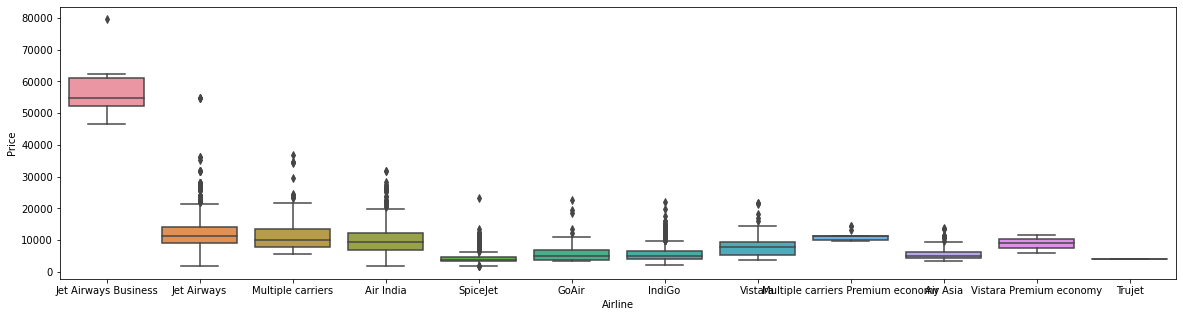

In [44]:
plt.figure(figsize=(20,5))
sns.boxplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False))

From the boxplot we can see that Jet Airways Business has the highest price. Also all are having almost same median except the Jet Airways Business.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

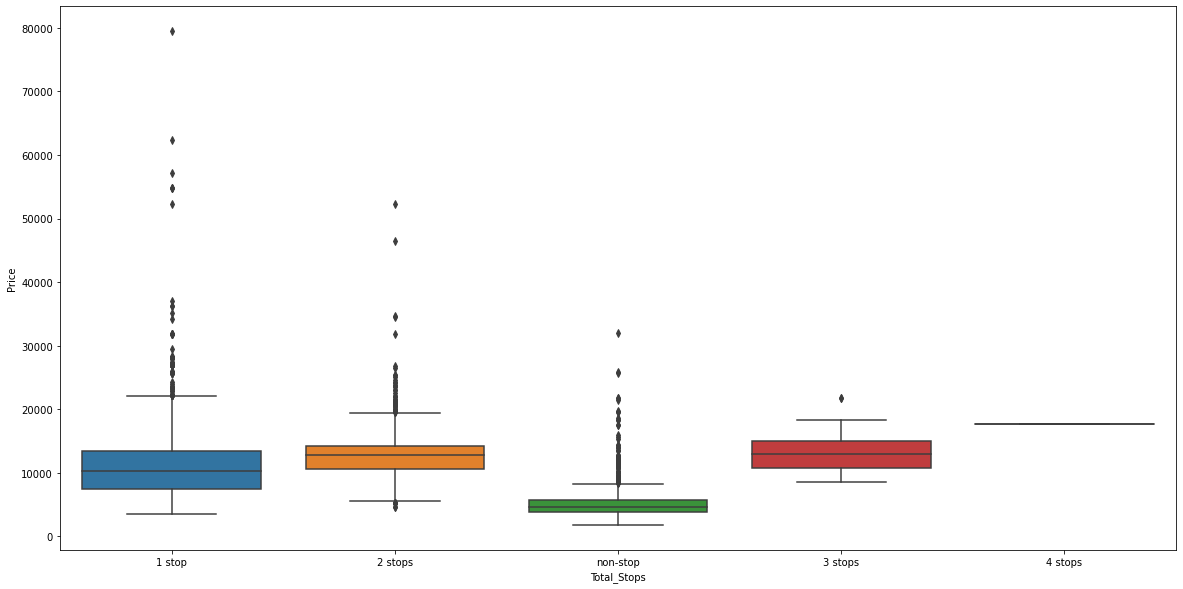

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False))

Airline having 1 stop have much fluctuation in its price than the one having 4 stops. 

In [46]:
len(categorical['Airline'].unique())

12

In [47]:
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)    ## As Airline is Nominal data we will perform OneHotEncoding
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [48]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1440x720 with 0 Axes>

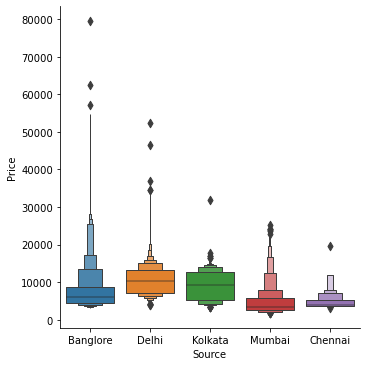

In [49]:
plt.figure(figsize=(20,10))                                              ##  Source vs Price
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen')

Bangalore has highest fluctuation in data while Delhi has highest median comparative to others.

In [50]:
Source=pd.get_dummies(categorical['Source'], drop_first=True)        ## As Source is Nominal data we will perform OneHotEncoding
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [51]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [52]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


<AxesSubplot:xlabel='Destination', ylabel='Price'>

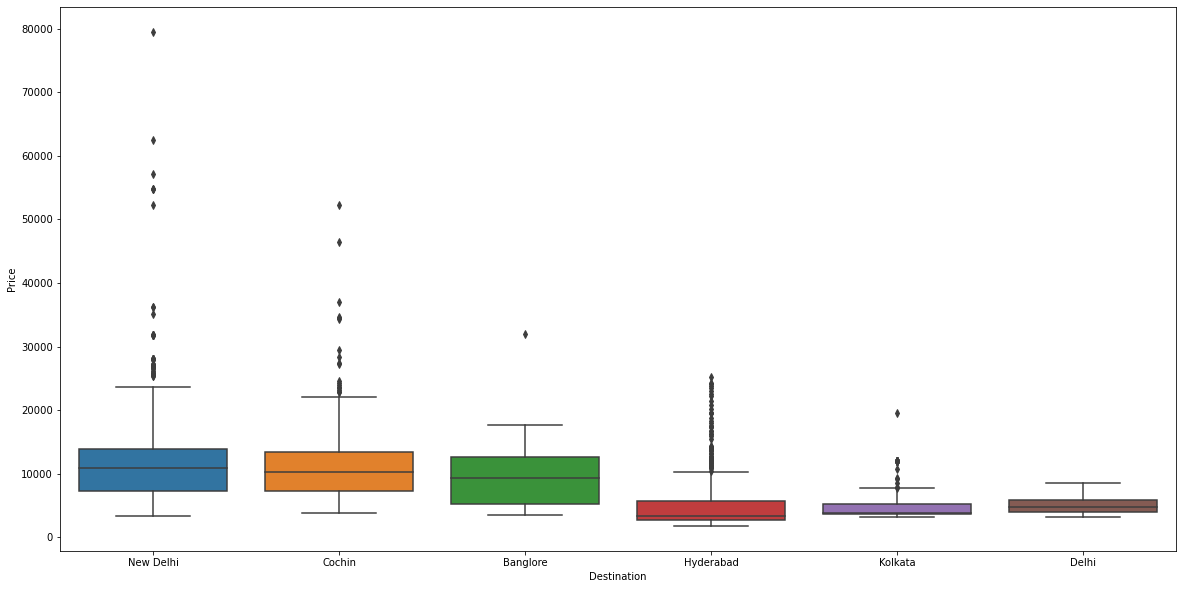

In [53]:
plt.figure(figsize=(20,10))                                              ##  Destination vs Price
sns.boxplot(y='Price',x='Destination',data=train_data.sort_values('Price',ascending=False))

We can observe that flights going to New Delhi has highest fare while that going to kolkata has lowest.

In [54]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [55]:
categorical['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [56]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

<ipython-input-56-103bd018a128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1']=categorical['Route'].str.split('→').str[0]
<ipython-input-56-103bd018a128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2']=categorical['Route'].str.split('→').str[1]
<ipython-input-56-103bd018a128>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [57]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [58]:
drop_column(categorical,'Route')

C:\Users\ADMIN\.conda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [60]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [61]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [62]:
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)

In [63]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

Now we have no missing values.

In [64]:
## extract how many categories in each cat_feature

for i in categorical.columns:                       
    print('{} has total {} categories \n'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



Since we can see we have lots of features in Route , one hot encoding will not be a better option so we will appply Label Encoding.

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [66]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [67]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [68]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [69]:
## Additional_Info contains almost 80% no_info,so we can drop this column.

drop_column(categorical,'Additional_Info')

In [70]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [71]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

We can convert non-stop with 0, 2 stops with 2, 3 stops with 3 and so on.

In [72]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [73]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [74]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [75]:
## Concatenate dataframe --> categorical + Airline + Source + Destination

data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [76]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [77]:
pd.set_option('display.max_columns',35)                        ## To display all the columns

In [78]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


### Outlier Detection

In [79]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

<Figure size 4320x3600 with 0 Axes>

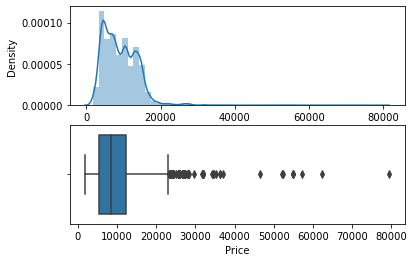

In [80]:
plt.figure(figsize=(60,50))
plot(data_train,'Price')

### Dealing with Outliers

In [81]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

<Figure size 4320x3600 with 0 Axes>

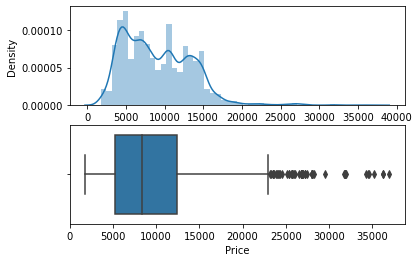

In [82]:
plt.figure(figsize=(60,50))
plot(data_train,'Price')

### Separate Independent & Dependent data

In [83]:
## separate independent & dependent data

X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [84]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

### Feature Selection
Finding out the best feature will contribute and have good relation with target variable. We select important features to get rid of curse of dimensionality ie..to get rid of duplicate features.
Here we are going to use the concept of INFORMATION GAIN for Feature Selection.

In [85]:
from sklearn.feature_selection import mutual_info_classif

In [86]:
mutual_info_classif(X,y)            ## This will return some kind of priority w.r.t target variable 

array([2.14584696, 2.00964111, 2.75563194, 2.30975367, 1.42884648,
       0.71924116, 0.76014086, 0.08523689, 0.63828491, 0.92239567,
       0.        , 0.5576251 , 0.01469157, 0.32360771, 0.01322872,
       0.22961076, 0.        , 0.18311597, 1.53022476, 0.90007646,
       0.27924144, 1.55600236, 0.40277463, 0.29080766, 0.16910456,
       0.37194088, 1.06830039, 0.8627702 , 1.41583796, 1.20377962,
       1.84734744, 1.52943243, 1.80018051, 1.07732299])

In [87]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.156375
Route_1,2.067796
Route_2,2.798478
Route_3,2.337165
Route_4,1.464247
Route_5,0.759742
Air India,0.757829
GoAir,0.094859
IndiGo,0.647276
Jet Airways,0.919163


In [89]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)


,importance
Route_2,2.798478
Route_3,2.337165
Total_Stops,2.156375
Route_1,2.067796
Arrival_Time_hour,1.841965
Duration_hours,1.789574
Arrival_Time_minute,1.567387
Cochin,1.555596
Delhi,1.542548
Route_4,1.464247


### Splitting Dataset into Train and Test

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [92]:
from sklearn import metrics

def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

In [93]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9531635209252022
predictions are: 
 [ 3845.10266667 11540.2125      4211.8        ...  4229.68733333
  8594.74       14214.8655    ]


r2 score: 0.8320019175263053
MAE: 1159.5194822668493
MSE: 3314485.948295702
RMSE: 1820.5729725269741


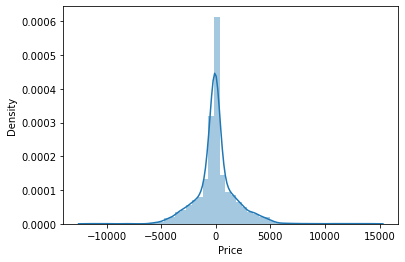

In [94]:
predict(RandomForestRegressor())

r2 score says that our model has 80% accuracy